# Fyttlyf Data Science Team Test
### Import libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('DS.csv')
data = df.copy()

### Part 0: Reading the data

In [2]:
df.shape

(2160, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Year                                                                                                                       2160 non-null   int64  
 1   Month                                                                                                                      2160 non-null   object 
 2   MobileWeb_or_Web                                                                                                           2160 non-null   object 
 3   Type_of_Customers?                                                                                                         2160 

In [4]:
df.describe(include='all')

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,2160,2160,2160,2160,2160,1.080000e+03,1.080000e+03,2.160000e+03,2.160000e+03
unique,NaN,12,2,2,3,5,NaN,NaN,NaN,NaN
top,NaN,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,NaN,NaN
freq,NaN,180,1080,1080,720,432,NaN,NaN,NaN,NaN
mean,2020.000000,NaN,NaN,NaN,NaN,NaN,7.844949e+05,3.584563e+05,1.510725e+05,5.922129e+04
std,0.816686,NaN,NaN,NaN,NaN,NaN,1.232518e+06,4.981331e+05,2.353538e+05,8.646564e+04
min,2019.000000,NaN,NaN,NaN,NaN,NaN,2.456700e+04,8.425000e+03,3.761000e+03,7.660000e+02
25%,2019.000000,NaN,NaN,NaN,NaN,NaN,1.406165e+05,8.060375e+04,3.360800e+04,1.157725e+04
50%,2020.000000,NaN,NaN,NaN,NaN,NaN,3.818205e+05,1.731775e+05,7.064950e+04,2.700450e+04
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,8.196922e+05,3.948560e+05,1.659590e+05,7.185350e+04


In [5]:
df.dtypes

Year                                                                                                                           int64
Month                                                                                                                         object
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
How_many_Landed_on_our_Page?                                                                                                 float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

### Part 1: Data cleaning

In [6]:
def data_cleaning(data):
    #Replacing NA with 0
    data = data.fillna(0)
    
    #Replacing Month names with 1,2,3...12
    mon = data['Month'].unique().tolist()
    num = [x for x in range(1,13)]
    data = data.replace(to_replace=mon, value=num)
    
    #Replacing String in Dataframe
    data = data.replace(['Came_From_Google', 'Landed_on_the_page_Directly'], ['Google', 'Direct_traffic'])
    return data

data = data_cleaning(data)

### Part 2: Descriptive statistics

In [7]:
def descriptive_stats(data):
    print('**********Mean***********')
    print(data.select_dtypes(exclude='object').mean())
    
    print('*********Median*********')
    print(data.select_dtypes(exclude='object').median())
    
    print('*********Quantile********')
    print(data.select_dtypes(exclude='object').quantile())
    
    print('*******Standard Derivation********')
    print(data.select_dtypes(exclude='object').std())
    
    print('*********Unique Values********')
    print('=> Type_of_Customers?')
    print(data['Type_of_Customers?'].unique())
    
    print('=> MobileWeb_or_Web')
    print(data['MobileWeb_or_Web'].unique())
          
    print('=> Where_Are_They_comming_from?')
    print(data['Where_Are_They_comming_from?'].unique())
    
    print('=> Which_Place_in_India?')
    print(data['Which_Place_in_India?'].unique())

descriptive_stats(data)

**********Mean***********
Year                                                                                                                           2020.000000
Month                                                                                                                             6.500000
How_many_Landed_on_our_Page?                                                                                                 392247.442593
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                                                     179228.131944
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?                                        151072.456019
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?     59221.291204
dtype: float64
*********Median*********
Year                                                                                                

### Part 3: Prescriptive statistics
* “Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”

In [8]:
data.groupby('Which_Place_in_India?')['How_many_Landed_on_our_Page?'].sum().nlargest(1)

Which_Place_in_India?
Pune    319132898.0
Name: How_many_Landed_on_our_Page?, dtype: float64

* “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?” 

In [9]:
ratio1 = data['How_many_Landed_on_our_Page?'] != 0
data.loc[ratio1, 'ratio'] = data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'] / data['How_many_Landed_on_our_Page?']
data[['Which_Place_in_India?', 'ratio']].nlargest(1, 'ratio')

,Which_Place_in_India?,ratio
262,Dehradun,0.618404


### Part 4: Simple Machine learning questions

In [10]:
pdata = data[data['How_many_Landed_on_our_Page?'] != 0]

In [11]:
x = pdata[['How_many_Landed_on_our_Page?', 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?']]
y = pdata[['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']]

In [12]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [13]:
reg.coef_

array([[-0.00394645,  0.13720888,  0.08107113]])

In [14]:
reg.intercept_

array([26497.15608186])

In [15]:
reg.score(x,y)

0.6220845868642246

#### Calculating and adding new column 'prediction' to dataframe

In [16]:
data.loc[data['How_many_Landed_on_our_Page?'] != 0, 'prediction'] = reg.predict(x)

#### Calculating and adding new column for 'MAPE'

In [17]:
data

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,ratio,prediction
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178,NaN,NaN
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916,NaN,NaN
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461,NaN,NaN
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667,NaN,NaN
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882,0.027965,29714.139147
2156,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703,0.038818,50057.658105
2157,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089,0.042884,30724.452525
2158,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465,0.132314,79905.352631


In [18]:
mape = (pdata['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'] - data['prediction']) /  data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [19]:
data.loc[data['How_many_Landed_on_our_Page?'] != 0, 'MAPE'] = mape.abs()*100

### Part 5: Visualization

#### Graph 1

<AxesSubplot:xlabel='Which_Place_in_India?'>

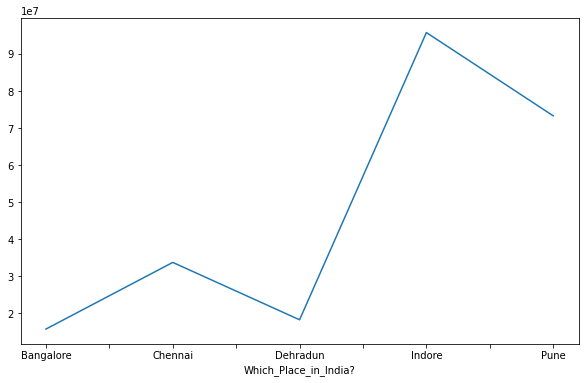

In [20]:
plt.figure(figsize = (10,6))
data[data['Year'].between(2019,2020)].groupby('Which_Place_in_India?')['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'].sum().plot()

#### Graph 2

In [21]:
yy1 = data.dropna().groupby(['Year', 'Month'])['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].sum()
yy2 = data.dropna().groupby(['Year', 'Month'])['prediction'].sum()

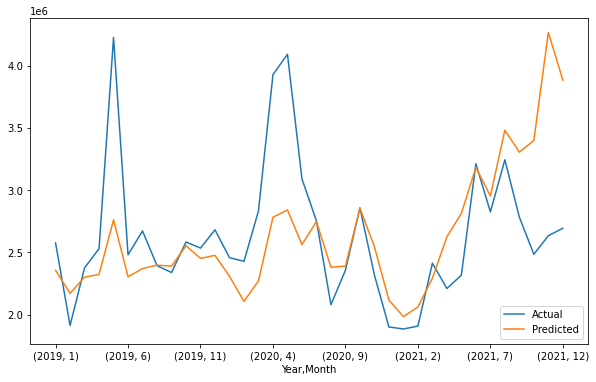

In [22]:
plt.figure(figsize = (10,6))
yy1.plot(kind = 'line', label = 'Actual')
yy2.plot(kind = 'line', label = 'Predicted')
plt.legend()

### Part 6: About the Previous projects

* I have worked on 2 projects based on data analysis. One is food sales data analysis using Excel and another one is data analysis on adventure works sales using PowerBI.

* Github - https://github.com/anulkanpuria/

### Part 7 : Time management

* I am looking for opportunity where i can be a part of the progressive and leading organization in order to achieve goals, where i can learn and implement skills and give my best.
* I have no issues doing full-time internship